In [ ]:
high_thresh, thresh_im = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh

In [86]:
file = '0530_5.jpg'
img = plt.imread(file,0)

(<matplotlib.image.AxesImage at 0x1a919b54320>, [])

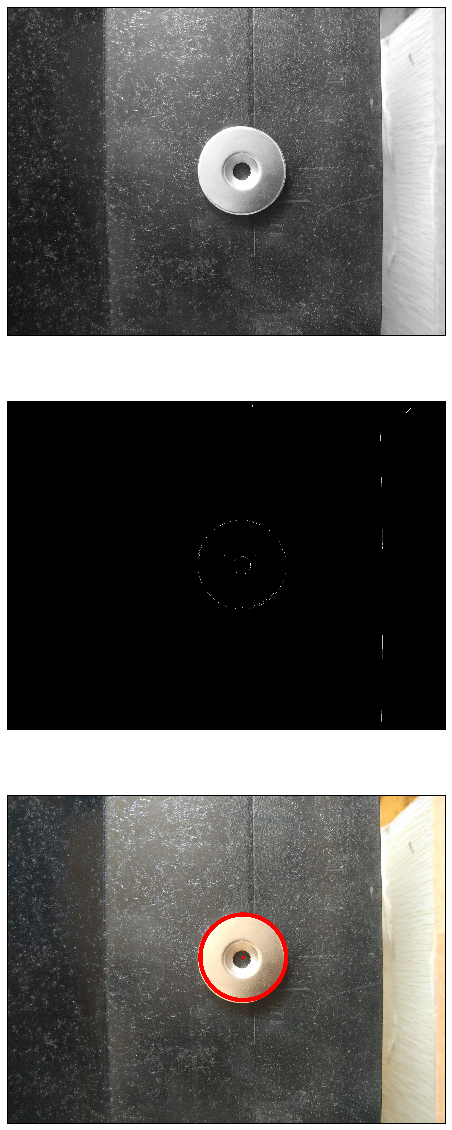

In [96]:
img = plt.imread(file)
for i in circles[:]: 
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
    cv2.circle(img,(i[0],i[1]),1,(255,0,0),thickness=30,lineType=4)#画圆心
f, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(20,20))
ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
ax2.imshow(edges,'gray'),plt.setp(ax2, xticks=[], yticks=[])
ax3.imshow(img),plt.setp(ax3, xticks=[], yticks=[])

检测出来1个圆
圆心的位置是 [ 940 1442]


(<matplotlib.image.AxesImage at 0x1a93bd37c50>, [])

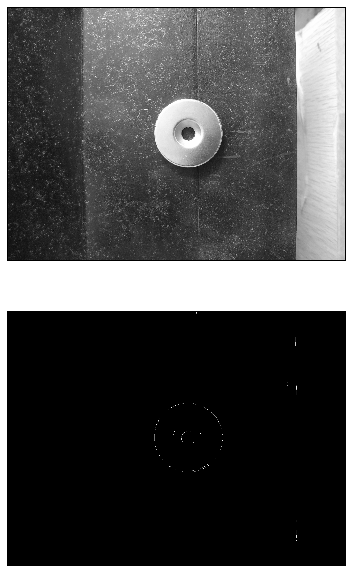

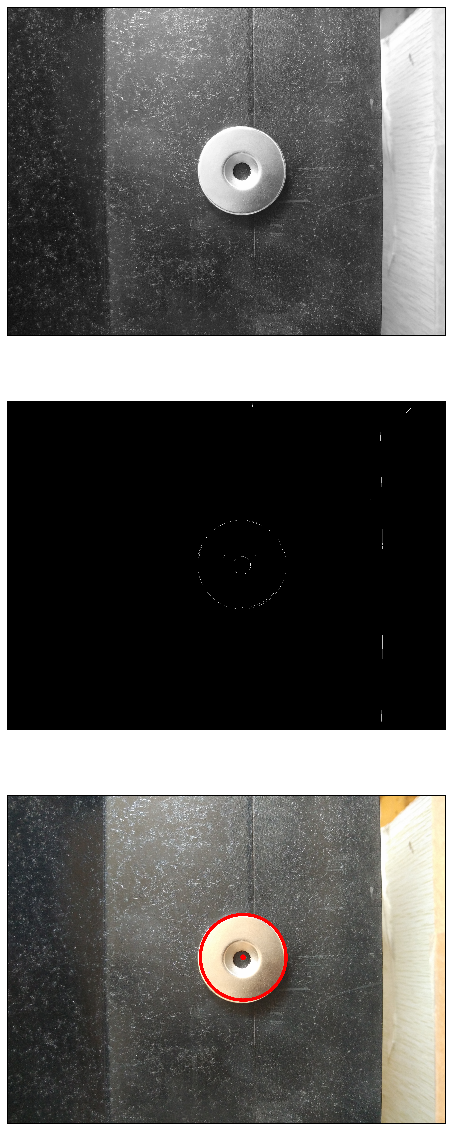

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = '0530_5.jpg'
img = plt.imread(file)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
blur = cv2.medianBlur(gray,25) #中值滤波

# #滤波前后对比
# f, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
# ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
# ax2.imshow(blur,'gray'),plt.setp(ax2, xticks=[], yticks=[])

#canny算子边缘检测
edges = cv2.Canny(blur,50,100)
plt.imshow(edges,'gray')

#hough检测圆
circles1 = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)
print ('检测出来%d个圆' % (len(circles1)))
print ('圆心的位置是',circles[0,:2])



#hough transform
circles = circles1[0,:,:]#提取为二维
circles = np.uint16(np.around(circles))#四舍五入，取整

for i in circles[:]: 
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
    cv2.circle(img,(i[0],i[1]),2,(255,0,0),thickness=10,lineType=4)#画圆心
img = plt.imread(file)
f, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(20,20))
ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
ax2.imshow(edges,'gray'),plt.setp(ax2, xticks=[], yticks=[])
ax3.imshow(img),plt.setp(ax3, xticks=[], yticks=[])